# What is the trend of player's market value from 2014 to 2020?

First I need to import the following: Pandas, Numpy, Matplotlib as I will be using them for my analysis.


In [135]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Importing the Dataset making sure to follow the exact file path.
Also using df.head() to get the first 5 columns of the data.

In [137]:
df = pd.read_csv('Documents/Data/Football/transfers.csv')
df.head()

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,195778,2026-06-30,25/26,79,27,VfB Stuttgart,Bayern Munich,0.0,12000000.0,Alexander Nübel
1,360791,2025-12-31,25/26,6418,1030,Panetolikos,Argentinos Jrs.,0.0,1200000.0,Lucas Chaves
2,731491,2025-12-31,25/26,209,46,River Plate,Inter,0.0,900000.0,Franco Carboni
3,1038821,2025-07-31,25/26,3837,11204,Fredrikstad,Stade Reims B,0.0,100000.0,Fallou Fall
4,229817,2025-07-01,25/26,1083,515,Rostov,Without Club,NaN,1700000.0,Ali Sowe


In [139]:
# This shows all the details of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64954 entries, 0 to 64953
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            64954 non-null  int64  
 1   transfer_date        64954 non-null  object 
 2   transfer_season      64954 non-null  object 
 3   from_club_id         64954 non-null  int64  
 4   to_club_id           64954 non-null  int64  
 5   from_club_name       64954 non-null  object 
 6   to_club_name         64954 non-null  object 
 7   transfer_fee         42109 non-null  float64
 8   market_value_in_eur  40132 non-null  float64
 9   player_name          64954 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 5.0+ MB


Next I have to clean the data to ensure that there is no null values that could damage my work and make it inaccurate.

In [52]:
#I used this code to check if there was any null values within the column by just printing the column needed.
df["market_value_in_eur"]

0        12000000.0
1         1200000.0
2          900000.0
3          100000.0
4         1700000.0
            ...    
64949           NaN
64950           NaN
64951           NaN
64952           NaN
64953           NaN
Name: market_value_in_eur, Length: 64954, dtype: float64

In [66]:
#I used dropna() to remove any null values from the column.
df_cleaned = df.dropna(subset=['market_value_in_eur'])
print(df_cleaned["market_value_in_eur"])


0        12000000.0
1         1200000.0
2          900000.0
3          100000.0
4         1700000.0
            ...    
64413       50000.0
64420       50000.0
64421      750000.0
64424     1750000.0
64425       50000.0
Name: market_value_in_eur, Length: 40132, dtype: float64


After cleaning the data, I have to find the average market value every 3 seasons starting at the 14/15 season.

In [92]:
# I filtered that data so that only the 14/15 season is shown.
df_2014 = df_cleaned[df_cleaned['transfer_season'] == '14/15']
df_2014

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
49223,166683,2015-07-01,14/15,10773,714,RCD Espanyol B,Espanyol,NaN,200000.0,Mamadou Sylla
49434,263801,2015-07-01,14/15,8494,237,RCD Mallorca B,RCD Mallorca,NaN,500000.0,Kasim Adams
50456,7161,2015-06-30,14/15,39,16,1.FSV Mainz 05,Bor. Dortmund,0.0,4000000.0,Jonas Hofmann
50457,16306,2015-06-30,14/15,720,418,FC Porto,Real Madrid,0.0,7000000.0,Casemiro
50458,18644,2015-06-30,14/15,1049,281,Valencia,Man City,0.0,22000000.0,Álvaro Negredo
...,...,...,...,...,...,...,...,...,...,...
52854,314137,2014-07-01,14/15,4807,46752,Shirak Gyumri,Krasnodar 3,NaN,25000.0,Eboue Kouassi
52874,317806,2014-07-01,14/15,2727,498,OH Leuven,KSC Lokeren,0.0,100000.0,Cyriel Dessers
52892,322873,2014-07-01,14/15,43983,75662,Adanaspor Yth,Adanaspor U19,NaN,50000.0,İrfan Can Eğribayat
52894,323379,2014-07-01,14/15,14829,19,Brescia U19,Brescia,NaN,100000.0,Racine Coly


In [94]:
# I used this code to find the mean market value in 2014.
average_market_value_2014 = df_2014['market_value_in_eur'].mean()
print("The average market value for 2014 is", round(average_market_value_2014, 2))

The average market value for 2014 is 1905312.76


In [110]:
# I filtered that data so that only the 17/18 season is shown.
df_2017 = df_cleaned[df_cleaned['transfer_season'] == '17/18']
df_2017

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
36523,390638,2018-07-16,17/18,17892,2029,Ceará U20,Ceará SC,NaN,400000.0,Arthur Cabral
36674,520517,2018-07-08,17/18,31276,46643,Sfintul Gheor.,FC Petrocub,0.0,100000.0,Mihail Ghecev
37279,341227,2018-07-01,17/18,2470,2464,Barça U19,Barcelona B,NaN,1000000.0,Juan Miranda
38644,11530,2018-06-30,17/18,368,141,Sevilla FC,Galatasaray,0.0,3000000.0,Lionel Carole
38645,23553,2018-06-30,17/18,1426,86,VVV-Venlo,Werder Bremen,0.0,1000000.0,Lennart Thy
...,...,...,...,...,...,...,...,...,...,...
42610,511119,2017-07-01,17/18,29206,19771,Akhisarspor U21,Akhisarspor,NaN,50000.0,Halil Yeral
42612,511534,2017-07-01,17/18,26507,5716,Kastrup BK,Fremad Amager,0.0,25000.0,Lukas Engel
42651,524687,2017-07-01,17/18,3728,235,UR Namur,RKC Waalwijk,0.0,25000.0,Saïd Bakari
43545,380919,2017-06-19,17/18,5610,282,Sarajevo U19,FK Sarajevo,NaN,100000.0,Nihad Mujakic


In [112]:
# I used this code to find the mean market value in 2014.
average_market_value_2017 = df_2017['market_value_in_eur'].mean()
print("The average market value for 2017 is", round(average_market_value_2017, 2))

The average market value for 2017 is 2283690.52


In [114]:
# I filtered that data so that only the 20/21 season is shown.
df_2020 = df_cleaned[df_cleaned['transfer_season'] == '20/21']
df_2020

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
17075,494954,2022-06-30,20/21,14589,16950,Orenburg,Zenit 2 S-Pb,0.0,450000.0,Kirill Kaplenko
17445,444209,2022-05-16,20/21,2802,371,Airdrieonians,Celtic,0.0,175000.0,Jonathan Afolabi
18674,532937,2022-01-02,20/21,252,7633,Genoa,UNAM Pumas,0.0,4000000.0,Johan Vásquez
19826,652331,2021-08-12,20/21,6767,11245,RM Castilla,UD Sanse,0.0,100000.0,Javi Rueda
20190,275218,2021-07-25,20/21,11470,209,O'Higgins,River Plate,0.0,550000.0,Augusto Batalla
...,...,...,...,...,...,...,...,...,...,...
27986,687617,2020-07-01,20/21,14282,11741,Akademia Dynamo,Dynamo M II,NaN,25000.0,Aleksandr Kutitskiy
28003,696346,2020-07-01,20/21,6942,9262,Fulham U18,Fulham U21,NaN,450000.0,Jay Stansfield
28017,702402,2020-07-01,20/21,68302,3137,FK TSC U19,FK TSC,NaN,50000.0,Nikola Bursac
28117,730573,2020-07-01,20/21,8305,1147,AC Ajaccio B,AC Ajaccio,NaN,300000.0,Faiz Mattoir


In [116]:
# I used this code to find the mean market value in 2014.
average_market_value_2020 = df_2020['market_value_in_eur'].mean()
print("The average market value for 2020 is", round(average_market_value_2020, 2))

The average market value for 2020 is 2825548.34


After finding all of the averages needed I know need to put them into a graph which is easy to read.

In [145]:
# I then put my findings into a dictionary where it can easily be manipluted into a bar chart.
MV_data = {'14/15': 1905312.76, '17/18': 2283690.52, '20/21': 2825548.34}
year = list(MV_data.keys())
average_MV = list(MV_data.values())

Text(0.5, 1.0, 'Average Market Value of a Player Every 3 Seasons')

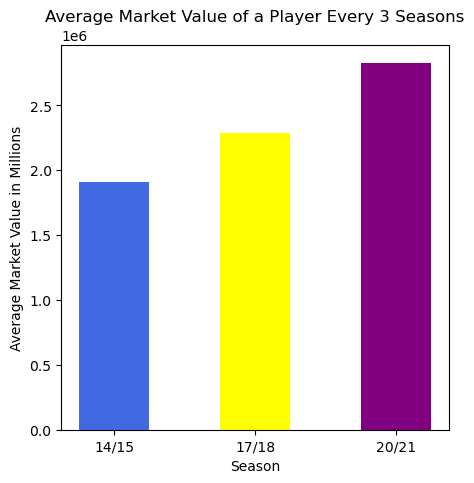

In [167]:
#I used this code to create a bar chart from my findings ensuring to label each axis and give the graph a title so everyone can understand what it is showing.
plt.figure(figsize=(5,5))
color = ['royalblue', 'yellow', 'purple']
plt.bar(year, average_MV, color= color, width=0.5)
plt.xlabel("Season")
plt.ylabel("Average Market Value in Millions") 
plt.title("Average Market Value of a Player Every 3 Seasons")

As you can see from the graph above the average market value for a player between 2014 and 2020 gradually increased every 3 year as the market becomes more inflated and we can expect this trend to continue in the oncoming years.